In [ ]:
#import rasterio
import numpy as np
import subprocess 
from subprocess import PIPE
#import rasterio
import json
import glob 
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split


In [ ]:
#pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Pre-processing

In [ ]:
def load_data(path):
    data = [] 
    images = list([])
    labels = []
    a=0
    for folder in os.listdir(path):
          if folder == 'flood':
            label = [1]
            for i in os.listdir(path + folder + "/"):
              if i[-36:] == '3B_AnalyticMS_SR_harmonized_clip.tif':
              #if i[-25:] == '3B_AnalyticMS_SR_clip.tif':
                print(path + folder + "/" + i)
                imarray = cv2.imread(path + folder + "/" + i)
                image = cv2.resize(imarray,dsize=(128,128),interpolation = cv2.INTER_CUBIC)
                #image = cv2.imread('data/flood/111921/5110385_1750918_2021-11-19_2459_BGRN_SR_clip.tif')
                #image = cv2.imread('data/flood/111921/20211119_150418_67_2459_3B_Visual_clip.tif')
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
          else:
            label = [0]
            for i in os.listdir(path + folder + "/"):
              #if i[-20:] == '3B_AnalyticMS_SR.tif':
              if i[-36:] == '3B_AnalyticMS_SR_harmonized_clip.tif':
                print(path + folder + "/" + i)
                imarray = cv2.imread(path + folder + "/" + i)
                image = cv2.resize(imarray,dsize=(128,128),interpolation = cv2.INTER_CUBIC)
                #image = cv2.imread('data/flood/111921/5110385_1750918_2021-11-19_2459_BGRN_SR_clip.tif')
                #image = cv2.imread('data/flood/111921/20211119_150418_67_2459_3B_Visual_clip.tif')
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
                
                break
    #images = list(images)
    #print(labels)
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
    #images = np.array(images)
    data.append([images, labels])     
    return images, labels

In [ ]:
#path = '/content/drive/MyDrive/KPMG Practicum/Data/'
#path = '/content/drive/MyDrive/KPMG Practicum/Data/'
train_images, train_labels = load_data(path)


/content/drive/MyDrive/KPMG Practicum/Data/flood/20190803_144444_0f4d_3B_AnalyticMS_SR_harmonized_clip.tif
/content/drive/MyDrive/KPMG Practicum/Data/flood/20190803_144443_0f4d_3B_AnalyticMS_SR_harmonized_clip.tif
/content/drive/MyDrive/KPMG Practicum/Data/flood/20190803_144442_0f4d_3B_AnalyticMS_SR_harmonized_clip.tif
/content/drive/MyDrive/KPMG Practicum/Data/flood/20190803_144444_1_0f4d_3B_AnalyticMS_SR_harmonized_clip.tif
/content/drive/MyDrive/KPMG Practicum/Data/flood/20190803_144445_0f4d_3B_AnalyticMS_SR_harmonized_clip.tif
/content/drive/MyDrive/KPMG Practicum/Data/flood/20190803_144452_0f4d_3B_AnalyticMS_SR_harmonized_clip.tif
/content/drive/MyDrive/KPMG Practicum/Data/flood/20190803_144451_0f4d_3B_AnalyticMS_SR_harmonized_clip.tif
/content/drive/MyDrive/KPMG Practicum/Data/flood/20190803_144446_0f4d_3B_AnalyticMS_SR_harmonized_clip.tif
/content/drive/MyDrive/KPMG Practicum/Data/flood/20190803_144453_0f4d_3B_AnalyticMS_SR_harmonized_clip.tif
/content/drive/MyDrive/KPMG Practic

In [ ]:
train_images.shape

(14, 128, 128, 3)

In [ ]:
train_labels.shape

(14, 1)

## train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.4, random_state=0)

X_train.shape, y_train.shape



((8, 128, 128, 3), (8, 1))

## Testing code for reading 4 band


In [ ]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/KPMG Practicum/Model/data/flood/111921/20211119_150418_67_2459_3B_Visual_clip.tif')
#im = Image.open('/content/drive/MyDrive/KPMG Practicum/PlanetData/Miami2021-11-19_psscene4band_analytic_sr_udm2/file/111921/5110385_1750918_2021-11-19_2459_BGRN_SR_clip.tif')
im.show()

FileNotFoundError: ignored

In [ ]:
imarray = np.array(im)
imarray.shape

In [ ]:
 res = cv2.resize(imarray,dsize=(128,128),interpolation = cv2.INTER_CUBIC)
 res.shape

## Model

### Fit the model with available data

In [ ]:
# Import the Deep Learing modules
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
#import pydot

# from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
import cv2
import os
import numpy as np

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (128,128, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [ ]:
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#history = model.fit(train_images, train_labels, batch_size=28, epochs=2, validation_split = 0.2)
history = model1.fit(X_train, y_train, batch_size=28, epochs=2, validation_split = 0.2)


Epoch 1/2
1/1 [==============================] - 1s 1s/step - loss: 0.1771 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
1/1 [==============================] - 0s 200ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


###Feature extraction with VGG ImageNet

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
train_features = model.predict(X_train)

test_features = model.predict(X_test)

In [ ]:
# Save the features calculated earlier
np.save("train_features.npy", train_features)
np.save("test_features", test_features)

# Load the trained weights
# loaded_array = np.load("train_features.npy")
# loaded_array = np.load("test_features.npy")

In [ ]:
type(train_features)

numpy.ndarray

In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

### training on top of VGG

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=28, epochs=30, validation_split = 0.2)

Epoch 1/30
1/1 [==============================] - 1s 515ms/step - loss: 1.9288 - accuracy: 0.2500 - val_loss: 10.7252 - val_accuracy: 0.3333
Epoch 2/30
1/1 [==============================] - 0s 38ms/step - loss: 1.4504e-06 - accuracy: 1.0000 - val_loss: 18.3550 - val_accuracy: 0.3333
Epoch 3/30
1/1 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 24.2753 - val_accuracy: 0.3333
Epoch 4/30
1/1 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 29.1693 - val_accuracy: 0.3333
Epoch 5/30
1/1 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 33.3283 - val_accuracy: 0.3333
Epoch 6/30
1/1 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 36.9412 - val_accuracy: 0.3333
Epoch 7/30
1/1 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 40.1180 - val_accuracy: 0.

In [ ]:
#plot_accuracy_loss(history)

In [ ]:
test_loss = model2.evaluate(test_features, y_test)


1/1 [==============================] - 0s 23ms/step - loss: 58.2011 - accuracy: 0.2727


## Threshold - ROC

In [ ]:
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [ ]:
#roc_curve(y_test, yhat)
y_test.shape
#y_score = model.predict(X_test)
#y_score.shape

(6, 1)

In [ ]:
# predict probabilities
y_probs = model1.predict(X_test)
# keep probabilities for the positive outcome only
y_probs = y_probs[:,1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
y_probs.shape

IndexError: ignored

In [ ]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=2.000000, G-Mean=0.000


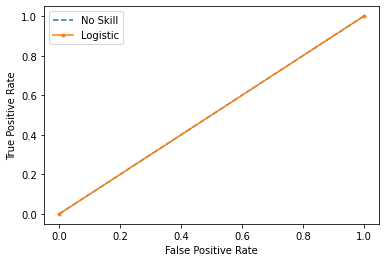

In [ ]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()